In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#setting the max columns to check the and view the coulmns present int he dataframe
pd.set_option('max_columns', 111)
df = pd.read_csv(r'D:\Personal\UpgradAIML\Lending Club case study\loan.csv')
df.head()

C:\Users\adash\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Checking the columns

In [2]:
# checking the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Missing Values

Checking the missing values in the columns and removing the columns

In [3]:
# checking the columns for the null values with their percentage
def nan_count(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(60))
    
nan_count(df)

                                Total   Percent
total_il_high_credit_limit      39717  1.000000
mo_sin_old_rev_tl_op            39717  1.000000
bc_util                         39717  1.000000
bc_open_to_buy                  39717  1.000000
avg_cur_bal                     39717  1.000000
acc_open_past_24mths            39717  1.000000
inq_last_12m                    39717  1.000000
total_cu_tl                     39717  1.000000
inq_fi                          39717  1.000000
total_rev_hi_lim                39717  1.000000
all_util                        39717  1.000000
max_bal_bc                      39717  1.000000
open_rv_24m                     39717  1.000000
open_rv_12m                     39717  1.000000
il_util                         39717  1.000000
total_bal_il                    39717  1.000000
mths_since_rcnt_il              39717  1.000000
open_il_24m                     39717  1.000000
open_il_12m                     39717  1.000000
open_il_6m                      39717  1

## Cleaning Data

In [4]:
# Removing null values
df = df[['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc',
           'verification_status','issue_d','loan_status','dti','earliest_cr_line','purpose','total_pymnt',
           'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
           'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','pub_rec_bankruptcies']]
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,earliest_cr_line,purpose,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,27.65,Jan-85,credit_card,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,1.00,Apr-99,car,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,8.72,Nov-01,small_business,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,20.00,Feb-96,other,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,17.94,Jan-96,other,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [5]:
# checking for null values in the chosen column and dropping null rows

# checking NUll values in the considered columns
df.isnull().sum()

#Droppping rows where there are null values
df = df.dropna()

#Checking the sinal six==ze of the dataframe
df.shape

#checking if there are any more null values
df.isnull().sum().sum()

0

## Data Cleaning
Cleaning the data for the newly created dataframe

In [6]:
#removing the string months from terms and turning dtype into int
df.term = df.term.str.replace('months', '')
df.term = df.term.astype('int')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,earliest_cr_line,purpose,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,27.65,Jan-85,credit_card,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,60,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,1.00,Apr-99,car,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,36,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,8.72,Nov-01,small_business,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,36,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,20.00,Feb-96,other,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,17.94,Jan-96,other,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [7]:
#removing the string % from int_rate and turning dtype into int
df.int_rate = df.int_rate.str.replace('%', '')
df.int_rate = df.int_rate.astype('float')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,earliest_cr_line,purpose,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,27.65,Jan-85,credit_card,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,1.00,Apr-99,car,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,8.72,Nov-01,small_business,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,20.00,Feb-96,other,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,17.94,Jan-96,other,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [8]:
#removing the string year, years, <, + by using reguar expression & turning it into integer
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

#changing the datdtype to integer
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,earliest_cr_line,purpose,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,27.65,Jan-85,credit_card,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,1.00,Apr-99,car,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,8.72,Nov-01,small_business,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,20.00,Feb-96,other,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,17.94,Jan-96,other,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


# Removing rows for the Target Variable
Target Variable = loan_status, since the "fully paid" represents that the loan has been successfully paid & "charged off" means its a defaulter. Need to remove the rows with loan_status as "current", since its still undergoing and we cannot determine if its goint to be completed or defaulter.

In [9]:
#selecting lona_status as 'Current'
target_current= df[df['loan_status'] == 'Current'].index

#dropping the columns
df.drop(target_current, inplace= True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,earliest_cr_line,purpose,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,27.65,Jan-85,credit_card,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,1.00,Apr-99,car,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,8.72,Nov-01,small_business,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,20.00,Feb-96,other,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,11.20,Nov-04,wedding,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


# Replacing the Target variables by 0,1
It will help in analysing the variables effectively once we convert the variables to AIML desiarable data type

Columns = loan status

In [10]:
# changing loan_status column to 0s & 1s
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

#converting datatype to integer
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

In [11]:
#checking the spread of data across

df.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36780.000000,36780.000000,36780.000000,36780.000000,36780.000000,3.678000e+04,36780.000000,36780.000000,36780.000000,36780.000000,36780.000000,36780.000000,36780.000000,36780.000000,36780.000000,36780.000000,36780.000000
mean,11145.893148,42.030016,11.984483,324.802754,5.081022,6.944143e+04,0.141762,13.333151,12011.645512,11535.443218,9759.496912,2153.451917,1.341685,97.355085,12.499901,2797.321101,0.041707
std,7368.469337,10.409719,3.701738,208.833384,3.398790,6.407051e+04,0.348810,6.650664,8848.676306,8705.342410,7033.759920,2411.189724,7.202136,700.058868,150.219099,4535.768693,0.200601
min,500.000000,36.000000,5.420000,16.080000,1.000000,4.000000e+03,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,5500.000000,36.000000,8.940000,167.730000,2.000000,4.100400e+04,0.000000,8.220000,5581.945991,5285.145000,4618.785000,660.012500,0.000000,0.000000,0.000000,223.125000,0.000000
50%,10000.000000,36.000000,11.830000,280.010000,4.000000,6.000000e+04,0.000000,13.430000,9825.226049,9367.040000,8000.000000,1327.885000,0.000000,0.000000,0.000000,591.010000,0.000000
75%,15000.000000,60.000000,14.460000,429.180000,9.000000,8.300000e+04,0.000000,18.590000,16311.641225,15625.962500,13500.000000,2718.942500,0.000000,0.000000,0.000000,3544.372500,0.000000
max,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,1.000000,29.990000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [12]:
# Checking the type of variables remaining after data cleaning process
numerical = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical))

categorical = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical))

#checking the default percentage
print(df['loan_status'].sum() / df['loan_status'] .count())

Number of Numerical features:  17
Number of Categorical features:  9
0.14176182707993476


# Analysing the columns with respect to target variable

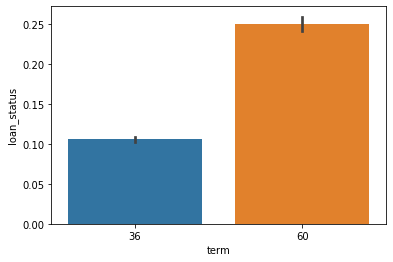

In [13]:
#checking the graph of the term againast the loan _status
sns.barplot(x='term', y='loan_status', data=df)
plt.show()

From the above graph/barplot we can say that the loan whth londer term iis expected to face that will have high default rate.

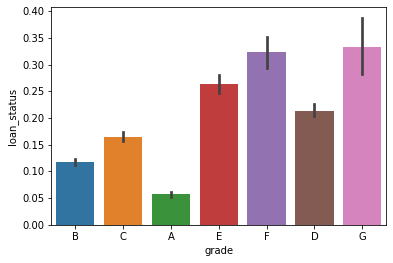

In [14]:
#checking grade againast the target variable

sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

This shows that the E, F & G grade have high default rate ratio across the status, it is hoighly likely that the people who are categorised into these grades are highly likely to default. We can aslo say that the defaulters increase as we go from a to G.

In [15]:
# defining a fuction to check the loan status since, we will have to check the loan_status across all types of variables/columns
def plot_default(loan_var):
    sns.barplot(x=loan_var, y='loan_status', data=df)
    plt.show()

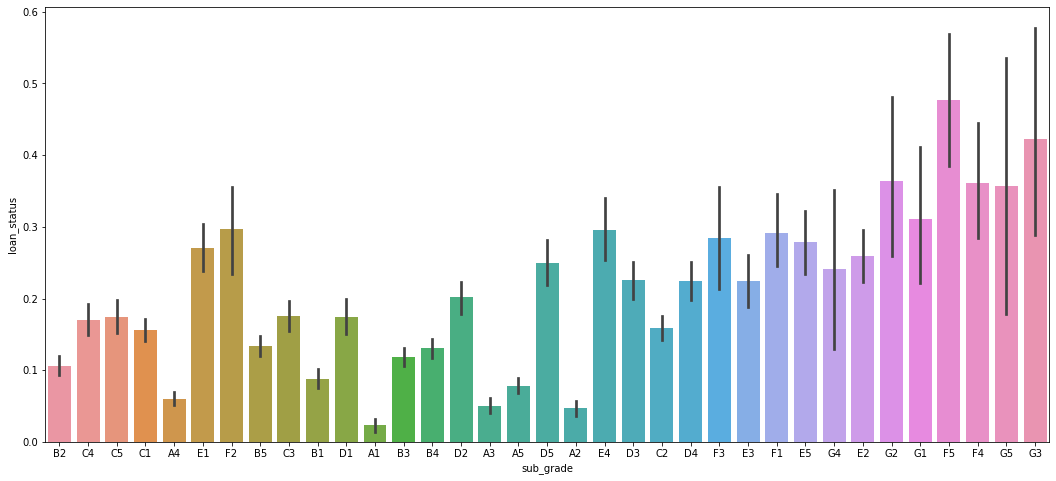

In [16]:
# comparing defaulters across sun grades attribute
plt.figure(figsize = (18, 8))
plot_default('sub_grade')

This is also in order with the conclusion we got after checking the grade graph, We can aslo say that the defaulters increase as we go from A_subgrade to G_subgrade. starting from E1, E2, E3................G1, G2, G3, G4 the default rate is higher.

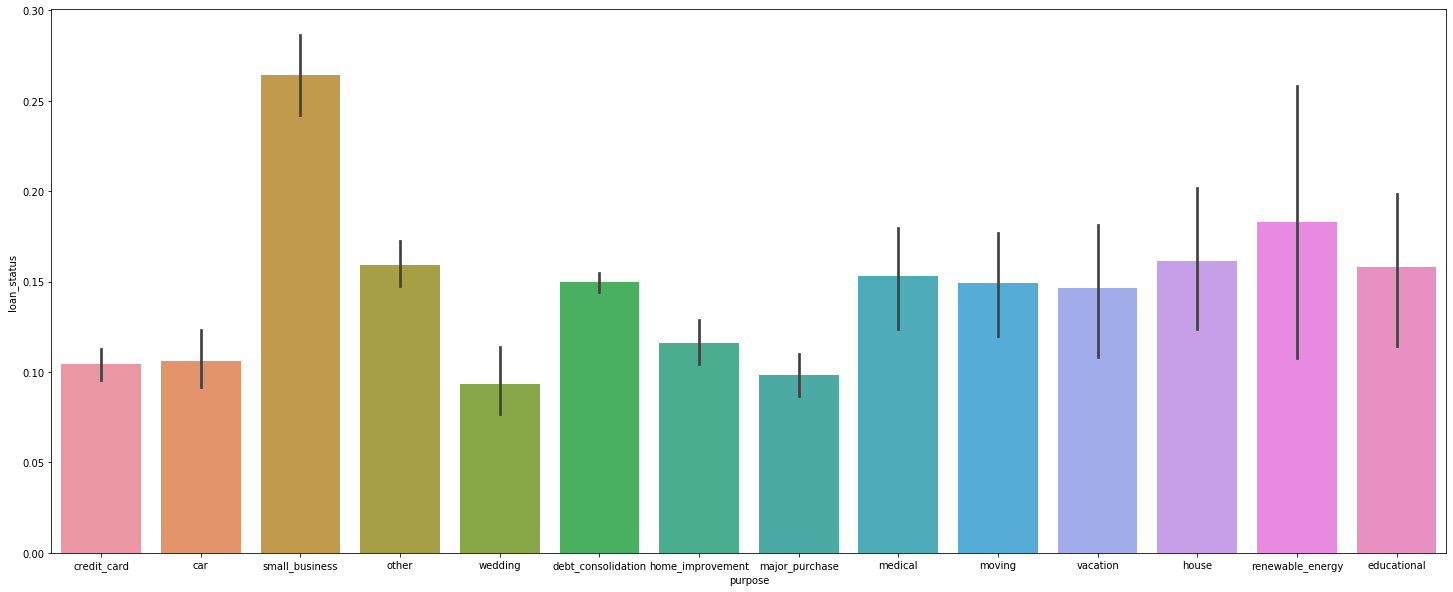

In [17]:
# purpose: small business loans defualt the most, then renewable energy and education

plt.figure(figsize=(25, 10))
plot_default('purpose')

We observe that loan acquired for purpose os small bussiness are at the leading higest rate of defaulters. Folled by renuable_energy(with maxinum outliers), educational & house koans.

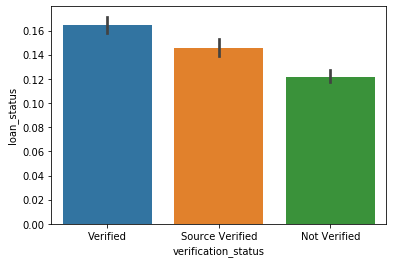

In [18]:
# verification_status: surprisingly, verified loans default more than not verifiedb
plot_default('verification_status')

Sources verified have the higest rate of default rate, so it doesnot matter if the sources are verified or not.

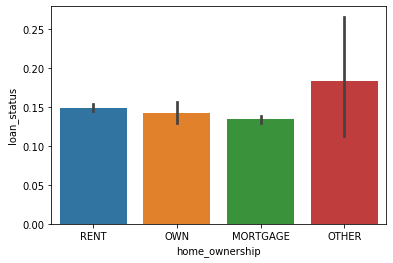

In [19]:
# checking againast home_ownership
plot_default('home_ownership')

observed that the people who have mortgage have lowest rate to default on the loan amount

In [20]:
# checking the column head of issue_d & distribution of loans across years
# converting issue d column from object to time and date type
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [21]:
from datetime import datetime as dt
df['issue_d'] = df['issue_d'].apply(lambda x: dt.strptime(x, '%b-%y'))

In [22]:
# extracting month and year from issue_d
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

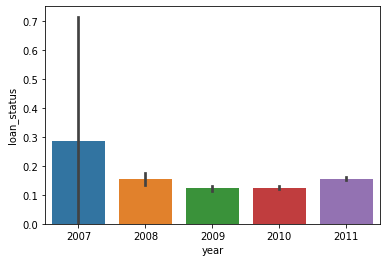

In [23]:
# checking the default rate across years
# the default rate is higest in 2007(also has the higest loan default amount ever encountered  ), lowest on 2009 and again increased steadly from 2009 till 2011
plot_default('year')

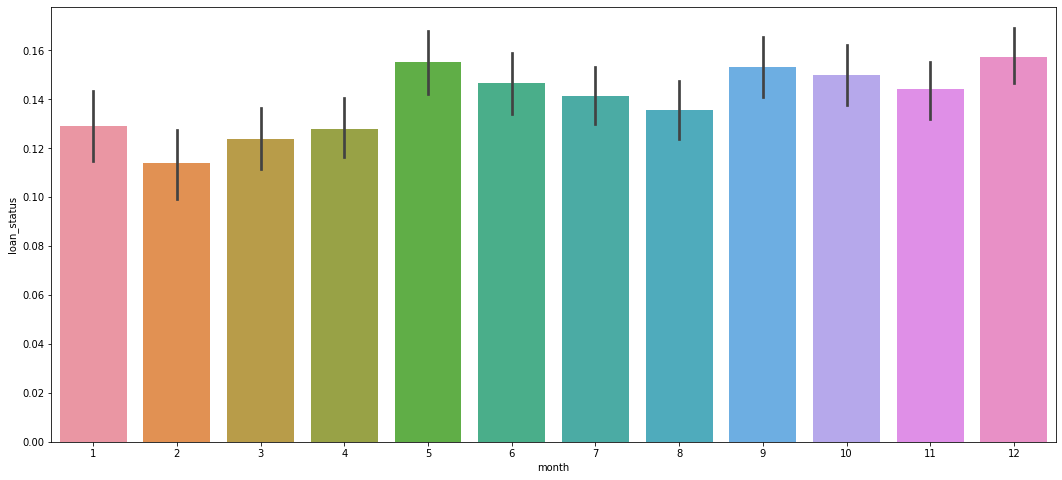

In [24]:
# comparing defaulters across all the months
# we see that the default is higest on 5th & 12 th month. And is lowest on 2nd month
plt.figure(figsize=(18, 8))
plot_default('month')

As the above data, the amount of loans have been steadly increasing across years.

In [25]:
# grouping loans by months, to find the most number of loans granted across which month's duration across all the years.
df.groupby('month').month.count()

month
1     2164
2     2108
3     2511
4     2752
5     2831
6     3086
7     3215
8     3285
9     3365
10    3583
11    3846
12    4034
Name: month, dtype: int64

maximum loans are provided in the month od december, or we can say 2nd half of the year

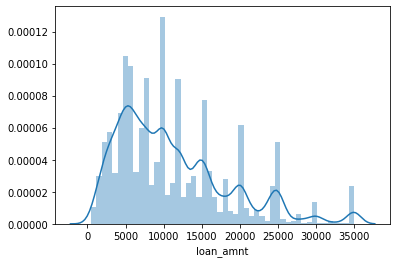

In [26]:
#checking the histogram data for the loan details, like median.
sns.distplot(df['loan_amnt'])
plt.show()

## Changing the continous variable into catrgorical variable to project the data, by binning the variable

In [27]:
# turning the loan amount into bins, into 4 categories
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'highest'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))


In [28]:
#counting the loans in each categories
df['loan_amnt'].value_counts()

medium     19757
high        7427
low         6912
highest     2684
Name: loan_amnt, dtype: int64

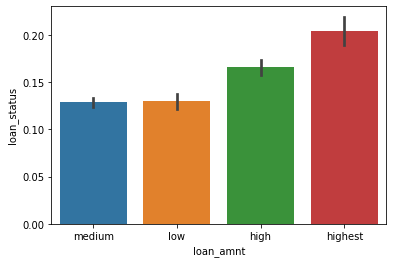

In [29]:
# comparing loan amount type across the diffrent cstegories
plot_default('loan_amnt')

we see that, highest the loan amount - higest the defaukt rate. the default rate steadly increases as the loan amount increases

In [30]:
# converting interest rate into bins, low medium high
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

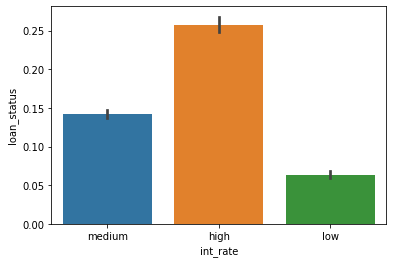

In [31]:
# comparing defaulters across binned interest rates
plot_default('int_rate')

we observe that, higher the intreast rate - higher the risk of defaulting the loan amount.

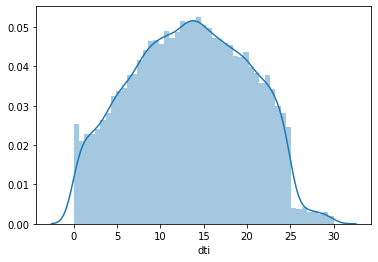

In [32]:
#checking the histogram data for the installments, like median data
sns.distplot(df['dti'])
plt.show()

In [33]:
# converting the dti ratio in to binns
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'

df['dti'] = df['dti'].apply(lambda x: dti(x))

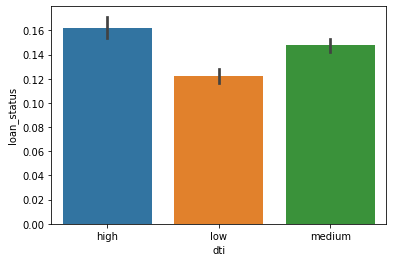

In [34]:
# comparing defaulters wrt dti ratio
plot_default('dti')

here is an intresting obervations, the persons with less DTI are least likely to default on their loan amount

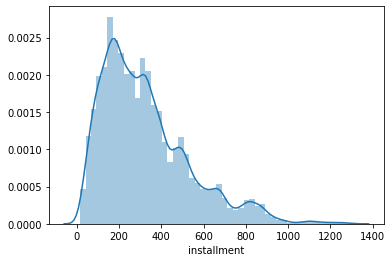

In [35]:
#checking the histogram data for the installments, like median data
sns.distplot(df['installment'])
plt.show()

In [36]:
# binning the installments to change the variable into catrgorical values to check
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'highest'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

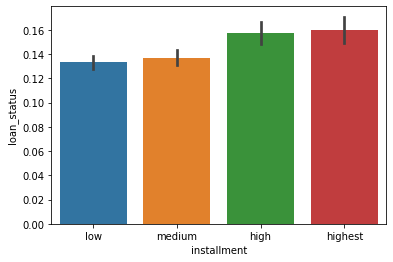

In [37]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot_default('installment')


we observe that the higher/high the installment amount, high prone the loan amount is to be defaulted

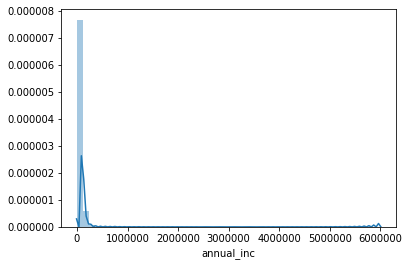

In [38]:
#checking the histogram data for the annual inc, like median data
sns.distplot(df['annual_inc'])
plt.show()

In [39]:
# binning the annual inc and changing the variable in to categorical variable
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'highest'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

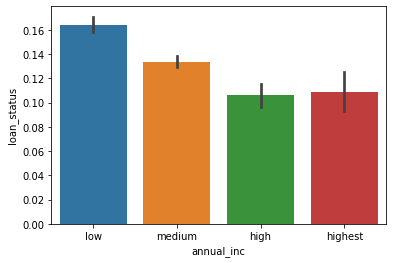

In [40]:
# checking defaulters againast annual inc
plot_default('annual_inc')

observed that lower the annual income, higest the risk of defaulting. 

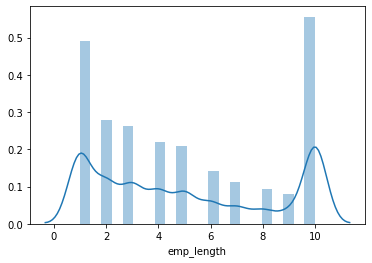

In [41]:
#checking the histogram data for the employment length, like median data
sns.distplot(df['emp_length'])
plt.show()

In [42]:
# binning employment length to turn into categorical data to better vizualize the information

def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

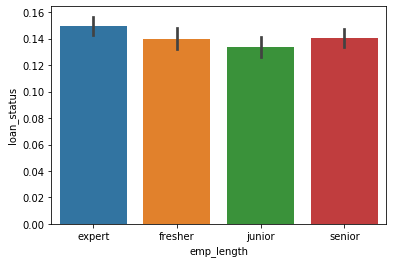

In [43]:
# defaulters with respect to emp_length
plot_default('emp_length')

## Analysis

We have compared the defaulters across various variables/columns & the important predictors are interest rate, annual income, grade.


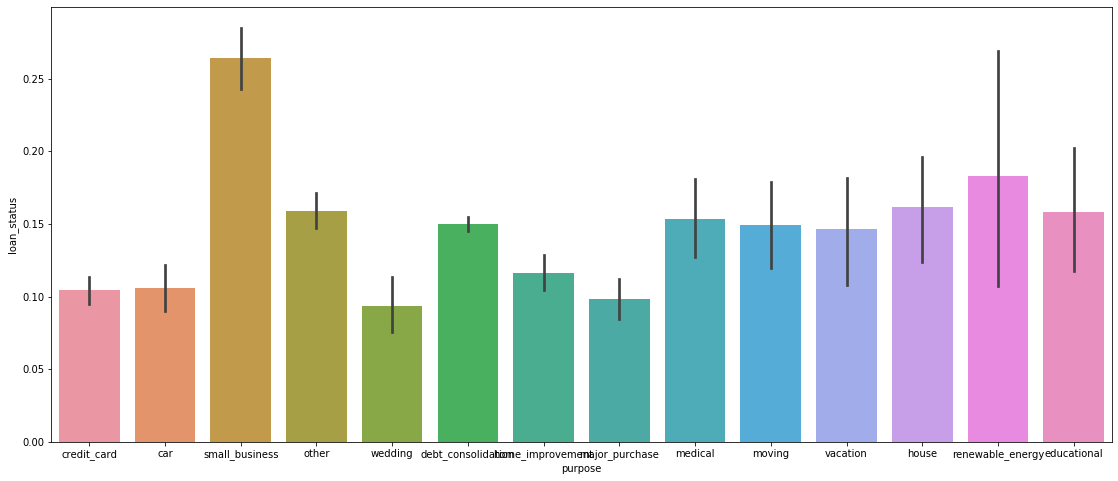

In [44]:
# Defaulters are prone to be higher in small business loans defualt the most, then followed by renewable energy and education

plt.figure(figsize=(19, 8))
plot_default('purpose')

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate. 

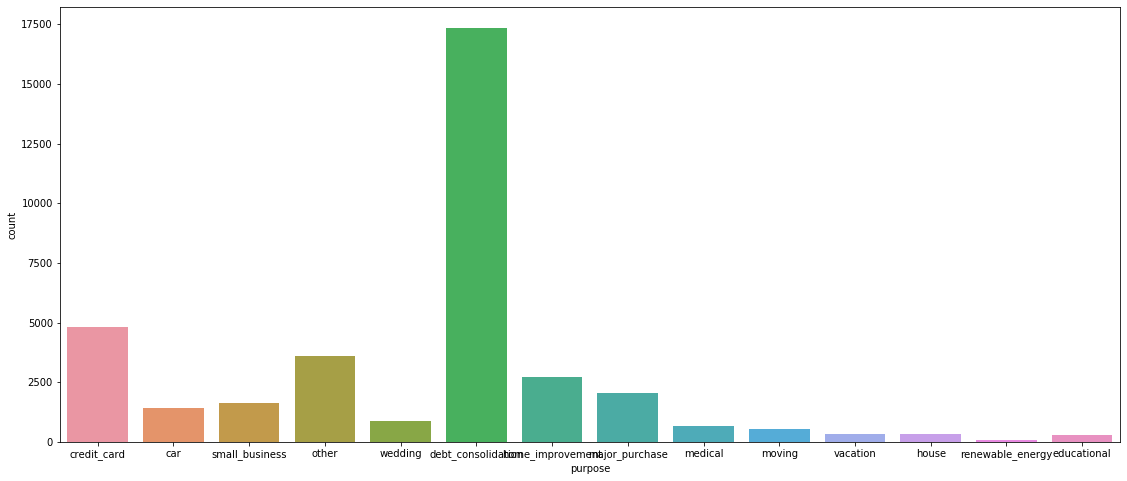

In [45]:
# cehcking the loan count, which are provided for diffrent purpose
#debt consolidation (to repay otehr debts) has the higest number of loans, then followed by credit card & others.
plt.figure(figsize=(19, 8))
sns.countplot(x='purpose', data=df)
plt.show()

Checking the graph its clear that that most of the loan are taken to clear debt of other loans(debt consolidation), then followed by credit card, other miscellanious purpose home improvement purpose & major purposes.

In [46]:
# collecting data for the above mentioned 4 major loan purposes,  skipping others category since it will not be conclusive
#in our analysis
#Removing other fiellds in purpose except for the major 4 which we have discovered above 

maximum_loan = ["debt_consolidation","credit_card","home_improvement","major_purchase"]
df = df[df['purpose'].isin(maximum_loan)]
df['purpose'].value_counts()

debt_consolidation    17356
credit_card            4799
home_improvement       2734
major_purchase         2056
Name: purpose, dtype: int64

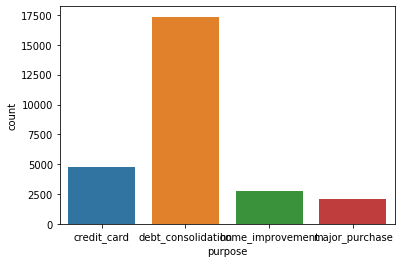

In [47]:
# checking the coount for the new purpose column 

sns.countplot(x=df['purpose'])
plt.show()

## Bivariate Analysis

Considering multiple variables to discover overlaying patters in the graph, to find conclusive results.

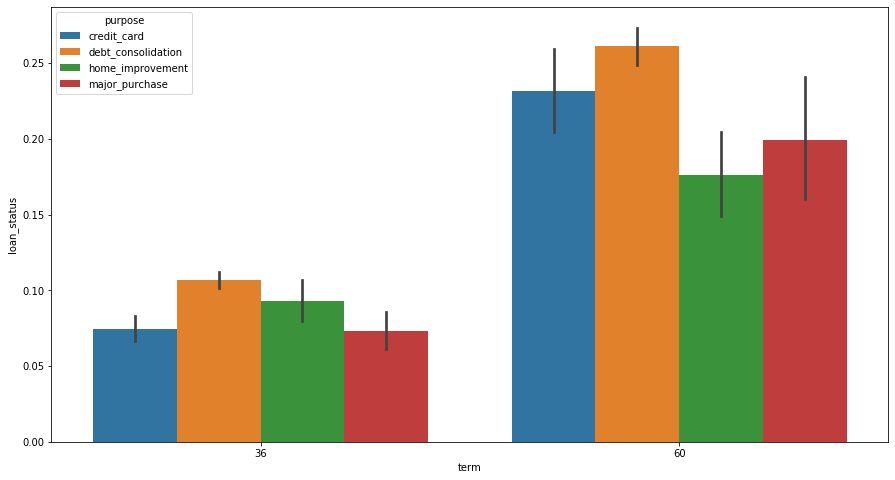

In [48]:
# Comparing the target variable- defaulters vs the two types of terms. Including purposes for which the loans were provided

plt.figure(figsize=[15, 8])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()


here the puropse of loan - which is a categorical variable, the terms -which is also a categorical variable vs target variable- which is a continous variable. Checking the 

**We will do the same thing that we did earlier, which is create a function to check the other categorial variables over and over again the see how this effects the ultiple variables.**


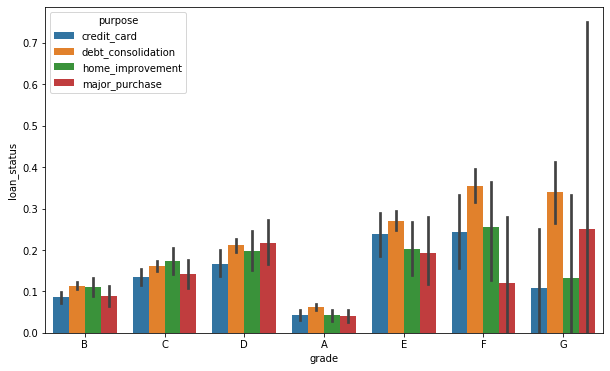

In [49]:
# creating a function to check the other categorical variables 

def plot_loan(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

#checking the function with respect to the grade column
plot_loan('grade')

<Figure size 2016x1296 with 0 Axes>

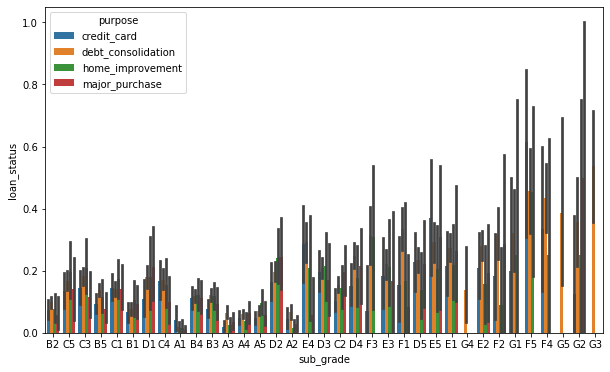

In [50]:
# checking the function with respect to subgrade

plt.figure(figsize=(28,18))
plot_loan('sub_grade')

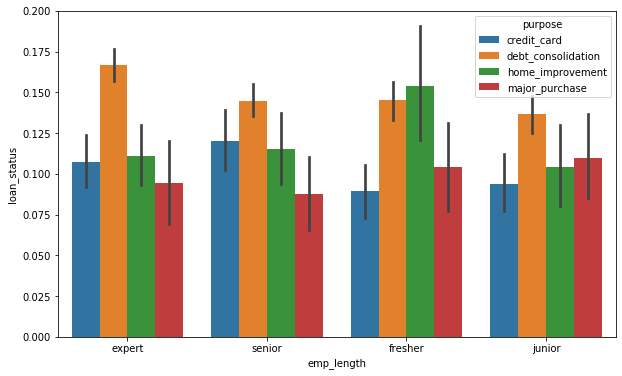

In [51]:
# checking the function with respect to emp_length
plot_loan('emp_length')

in here, debt_consolidation seems to have comsiderable high numbers of defaulters across all the categories of employees. Also the fresher seems to have higher default rate for home_improvement.

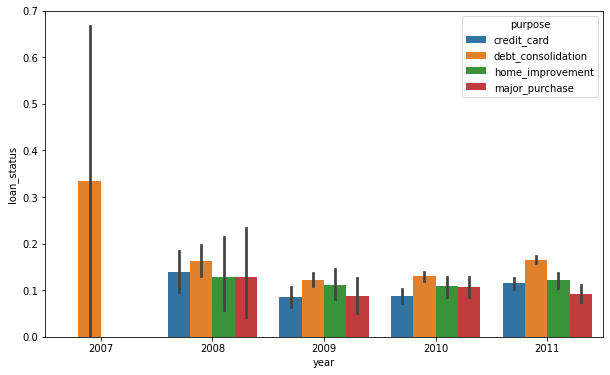

In [52]:
# checking the function with respect to year
plot_loan('year')

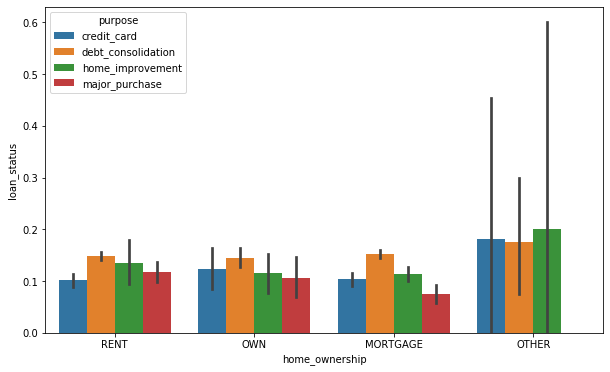

In [53]:
# checking the function with respect to house_ownership
plot_loan('home_ownership')

observed that debt_consolidation is pretty high across all the areas.

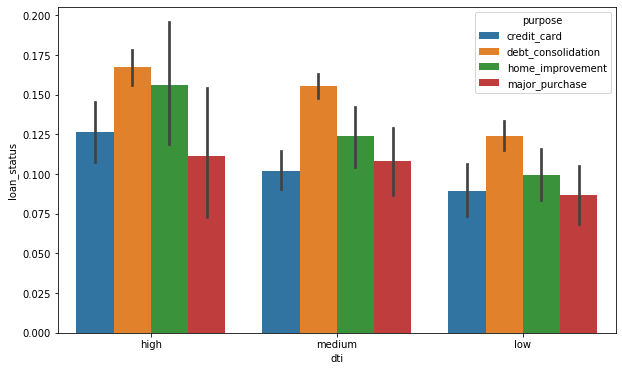

In [54]:
# checking the function with respect to dti
plot_loan('dti')

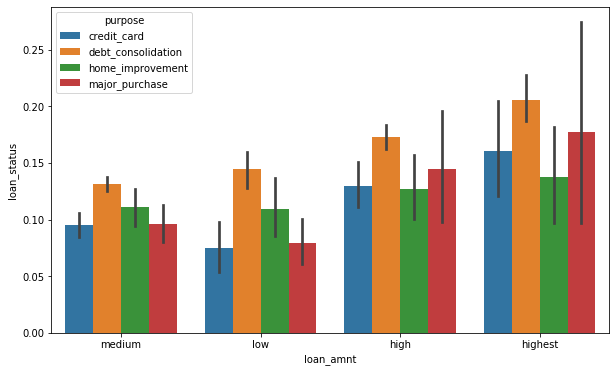

In [55]:
# checking the function with respect to loan_amount
plot_loan('loan_amnt')

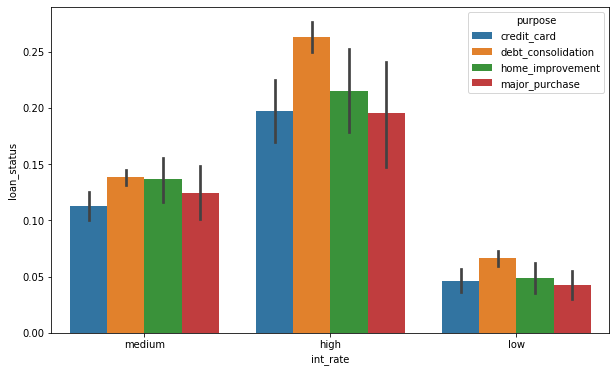

In [56]:
# checking the function with respect to intrest rate
plot_loan('int_rate')

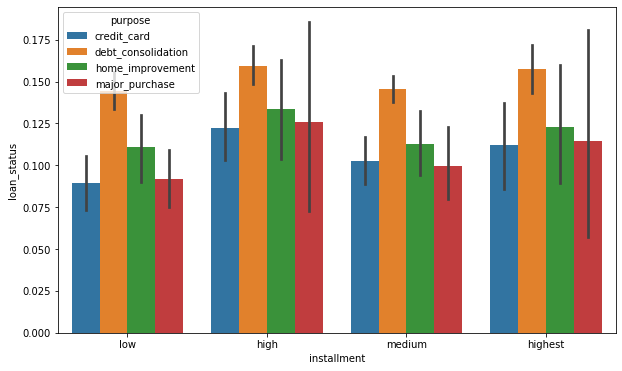

In [57]:
# checking the function with respect to installmenta
plot_loan('installment')

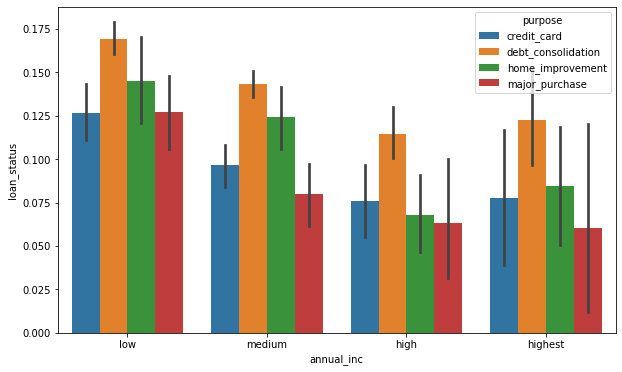

In [59]:
# checking the function with respect to annual income
plot_loan('annual_inc')

In [78]:
# checking the variation of defaulters across annual_inc, which will give us the numbers which is shown above

df.groupby('annual_inc').loan_status.mean().sort_values(ascending=True)

annual_inc
high         0.096036
very high    0.101869
medium       0.128339
low          0.156510
Name: loan_status, dtype: float64

**At the end of the day, regardless all the data vizualization techniques and presenting data in graphs. Numbers convey the most powerfull information in a one liner**

creating a function to do the above mentioend same with respect to the target variable.

In [64]:
# function to calculate hte average for the provided categorical variable againast target variable(default rate) 


def diffrence(var):
    defaulters = df.groupby(var).loan_status.mean().sort_values(ascending=False)
    return (round(defaulters, 2), round(defaulters[0] - defaulters[-1], 2))

In [65]:
#Checking the function for the variable annual income
defaulters, diff = diffrence('annual_inc')
print(defaulters) 
print(diff)


annual_inc
low        0.16
medium     0.13
highest    0.10
high       0.10
Name: loan_status, dtype: float64
0.06


it shows defalters acrosscategories & also shows diffrences between various range of categorical values.


In [72]:
# creating a new dataframe by filtering all the categorical variables
df_category = df.loc[:, df.dtypes == object]
df_category['loan_status'] = df['loan_status']

#checking the newly created dataframe
df_category.head()

#checking the newly created dataframe's size
df_category.shape

#checking if the newly created dataframe has any null values
df_category.isnull().sum().sum()

C:\Users\adash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

In [74]:
# Storing the details calculated for every collumn in a dictionary
dictionary = {key: diffrence(key)[1]*100 for key in df_category.columns if key != 'loan_status'}
print(dictionary)

{'loan_amnt': 7.000000000000001, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_length': 2.0, 'home_ownership': 3.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'dti': 5.0, 'earliest_cr_line': 100.0, 'purpose': 5.0, 'last_pymnt_d': 100.0, 'last_credit_pull_d': 43.0}
